![alt text](Task_5.png)

▶*TASK-5 : Credit Card Fraud Detection*

> Author: Hamesh Raj

> Batch: April

> Domain: Data Science

*Step 1: Importing necessary libraries*

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

print("All libraries successfully imported")

# Set pandas display option
pd.set_option('display.max_columns', None)

All libraries successfully imported


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
dataset is here. notuploaded due to maximum size.

*Step 2: Load the transaction data*

In [47]:
df = pd.read_csv("creditcard.csv")

In [48]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


*Step 3: Data preprocessing*

In [49]:
print("Number of rows in the dataset: ", df.shape[0])
print("Number of Columns in the dataset: ", df.shape[1])

Number of rows in the dataset:  284807
Number of Columns in the dataset:  31


In [50]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [52]:
#Checking the number of Missing values in the Dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
#Distribution of Legit tarnsactions and fraudulent transactions
df['Class'].value_counts()
#This dataset is highly unbalanced (0-Legit transcation, 1-Fradulent transaction)

Class
0    284315
1       492
Name: count, dtype: int64

In [54]:
#Separating the dataset for analysis
fraud = df[df.Class == 1]
legit = df[df.Class == 0]
outlierFraction = len(fraud) / float(len(legit))
outlierFraction

0.0017304750013189597

In [55]:
#Statistical Dsceription of the Fraud dataset
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [56]:
#Statistical Dsceription of the Legit dataset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [57]:
print(f'Fraud Transactions: {len(fraud)}')
print(f'Valid or Legit Transactions: {len(legit)}')

Fraud Transactions: 492
Valid or Legit Transactions: 284315


In [58]:
# checking the balance of the dataset
fraud_count = df["Class"].value_counts()
fraud_rate = 100*fraud_count/df.shape[0]
fraud_data = pd.concat([fraud_count, fraud_rate], axis=1).reset_index()
fraud_data.columns = ['Class', 'Count', 'Percentage']

fraud_data

,Class,Count,Percentage
0,0,284315,99.827251
1,1,492,0.172749


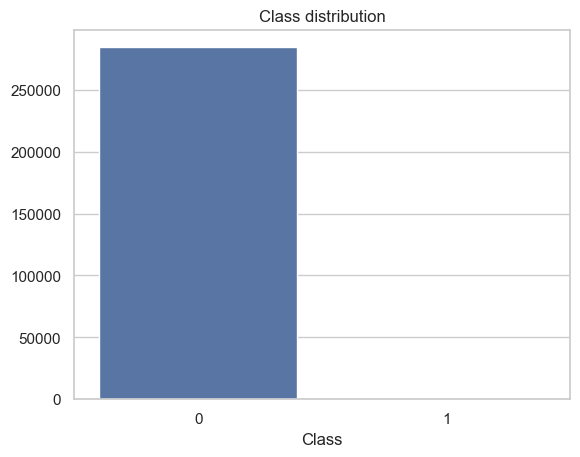

In [59]:
sns.set_theme(style = 'whitegrid')

class_counts =df['Class'].value_counts()

sns.barplot(x= class_counts.index, y= class_counts.values)
plt.title('Class distribution')
plt.show()

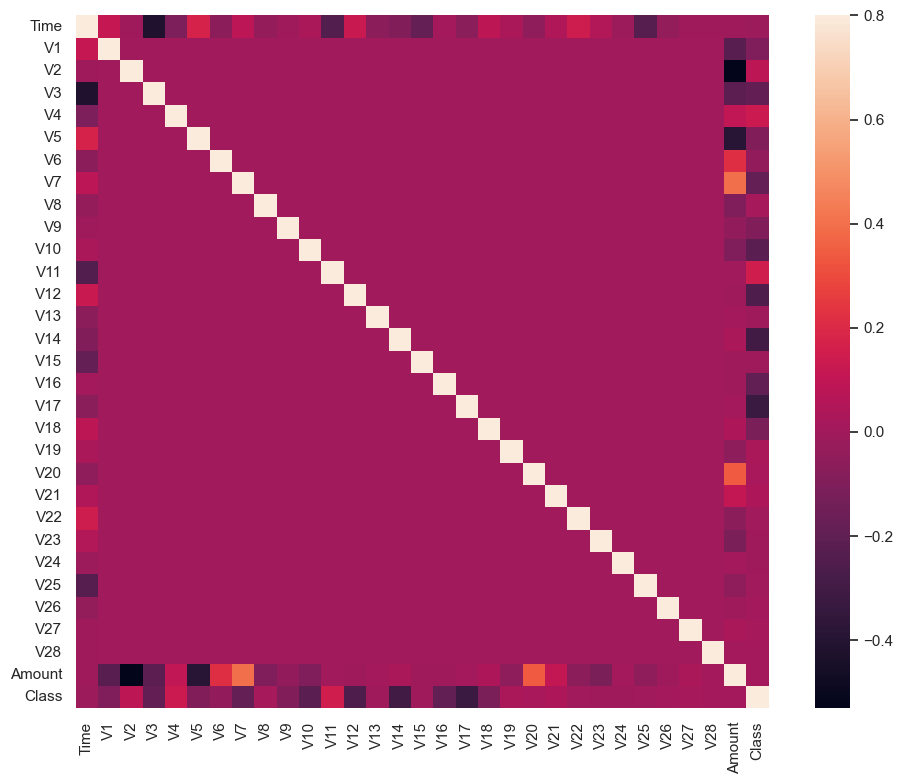

In [60]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [61]:
#Compare the values for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Dealing with the Unbalanced data(284315 and 492):
Undersampling

In [62]:
#Build a sample dataset containing similar distribution of Legit transactions and Fradulent transactions
#The number of fraudent transations is 492
legit_sample = legit.sample(n= 492)
#Concatenating/joining the two datasets
new_df = pd.concat([legit_sample, fraud], axis= 0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123015,76776.0,1.165500,0.214348,-0.222320,0.821284,0.286760,-0.267630,0.364078,-0.066669,-0.349120,0.147399,0.586241,0.522699,-0.312796,0.747307,0.184498,0.463707,-0.896071,0.149111,0.508151,-0.025424,-0.366513,-1.252949,-0.016917,-0.596097,0.458207,-0.709760,-0.013599,0.013461,57.26,0
23483,32780.0,1.091085,-0.518348,1.142943,-0.002519,-1.167524,0.080667,-0.881450,0.348852,0.847418,-0.183207,1.381111,0.558007,-1.240832,0.167935,0.400195,0.246291,-0.051830,-0.150046,-0.047930,-0.124993,0.011524,0.060441,0.107482,0.274676,-0.093573,0.986557,-0.037627,0.006014,26.45,0
268091,163056.0,-0.987368,1.855596,-1.401459,-0.589757,0.209469,-0.909173,0.248711,0.772947,0.025627,-0.663829,-1.060962,0.112821,0.015721,-0.506124,-0.261627,0.577087,0.651868,-0.120830,-0.256064,0.037722,-0.330967,-0.934352,0.196972,0.461953,-0.263696,0.133761,0.196480,0.064007,11.99,0
54652,46543.0,1.113026,0.093840,0.503973,1.491379,-0.414199,-0.386309,0.022830,0.020168,0.426533,-0.100964,-0.424849,0.076837,-1.240102,0.298453,-0.000240,-0.766723,0.442666,-0.952087,-0.487953,-0.238796,-0.083734,-0.090452,-0.021840,0.392866,0.578753,-0.331017,0.030668,0.019606,22.91,0
209522,137604.0,2.081132,-0.181971,-1.837259,-0.208765,0.573806,-0.324649,0.172092,-0.104811,0.538683,0.067709,0.256312,0.563469,-0.662732,0.707110,-0.444192,-0.056534,-0.669608,0.112048,0.820048,-0.209616,-0.142129,-0.346523,0.136191,0.084217,0.079583,-0.091034,-0.065306,-0.072716,9.60,0


In [63]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [64]:
# checking the balance of the dataset
fraud_count = new_df["Class"].value_counts()
fraud_rate = 100*fraud_count/new_df.shape[0]
fraud_data = pd.concat([fraud_count, fraud_rate], axis=1).reset_index()
fraud_data.columns = ['Class', 'Count', 'Percentage']

fraud_data

,Class,Count,Percentage
0,0,492,50.0
1,1,492,50.0


In [65]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98061.378049,-0.002068,-0.037540,-0.133172,-0.077162,0.076840,-0.060193,0.045948,-0.038129,0.121719,0.085718,-0.050012,0.007594,0.003218,-0.000998,-0.002304,0.030874,-0.072153,0.053656,-0.026826,0.002513,0.027482,-0.048095,0.008799,0.010995,0.002997,0.022317,0.011096,0.009486,89.040142
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


*Step 4: Splitting the datset into features and Target*

In [66]:
X=new_df.drop(columns='Class', axis= 1)
y= new_df['Class']

In [67]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
123015   76776.0  1.165500  0.214348 -0.222320  0.821284  0.286760 -0.267630   
23483    32780.0  1.091085 -0.518348  1.142943 -0.002519 -1.167524  0.080667   
268091  163056.0 -0.987368  1.855596 -1.401459 -0.589757  0.209469 -0.909173   
54652    46543.0  1.113026  0.093840  0.503973  1.491379 -0.414199 -0.386309   
209522  137604.0  2.081132 -0.181971 -1.837259 -0.208765  0.573806 -0.324649   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [68]:
print(y)

123015    0
23483     0
268091    0
54652     0
209522    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [69]:
X.shape, y.shape

((984, 30), (984,))

In [70]:
X_df = X.values
y_df = y.values

In [71]:
X_df

array([[ 7.67760000e+04,  1.16549995e+00,  2.14347863e-01, ...,
        -1.35985471e-02,  1.34610076e-02,  5.72600000e+01],
       [ 3.27800000e+04,  1.09108463e+00, -5.18348143e-01, ...,
        -3.76271810e-02,  6.01413734e-03,  2.64500000e+01],
       [ 1.63056000e+05, -9.87367856e-01,  1.85559588e+00, ...,
         1.96480450e-01,  6.40068646e-02,  1.19900000e+01],
       ...,
       [ 1.69351000e+05, -6.76142671e-01,  1.12636606e+00, ...,
         3.85107449e-01,  1.94361479e-01,  7.78900000e+01],
       [ 1.69966000e+05, -3.11383161e+00,  5.85864172e-01, ...,
         8.84875540e-01, -2.53700319e-01,  2.45000000e+02],
       [ 1.70348000e+05,  1.99197610e+00,  1.58475887e-01, ...,
         2.98758224e-03, -1.53088128e-02,  4.25300000e+01]])

In [72]:
y_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

*Step 5: Split the dataset into training and testing sets*

In [73]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = .2,
                                                   random_state = 42)

In [74]:
print(f'''X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}''')

print("\nSplitted successfully")

X_train: (787, 30)
X_test: (197, 30)
y_train: (787,)
y_test: (197,)

Splitted successfully


### Fitting a Random Forest Model

In [75]:
randomForestModel = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])
randomForestModel.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [76]:
# prediction 
y_pred_logis = randomForestModel.predict(X_test)
y_pred_logis

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [77]:
# classification report 
cr = classification_report(y_test, y_pred_logis)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



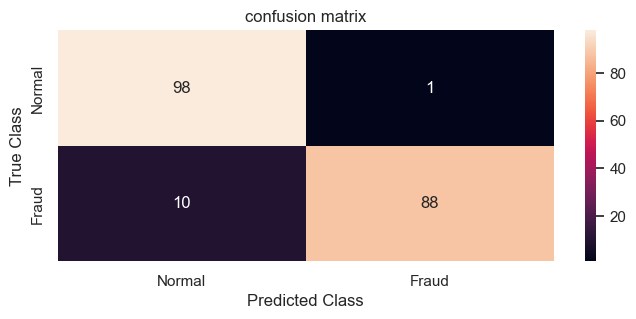

In [78]:
labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred_logis)
plt.figure(figsize = (8, 3))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, 
           fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

*Applying Logistic Regression*

In [79]:
#Logistic regression
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [80]:
#Accuracy score
#Accuracy on training data
X_train_prdiction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prdiction, y_train)
print("Acurracy on training data is:",training_data_accuracy)

Acurracy on training data is: 0.9415501905972046


In [81]:
#Accuracy on test_data
X_test_prdiction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prdiction, y_test)
print("Acurracy on training data is:",testing_data_accuracy)

Acurracy on training data is: 0.9390862944162437


In [82]:
acc = accuracy_score(y_test, X_test_prdiction)
print("Accuracy Score: ", acc)

prec = precision_score(y_test, X_test_prdiction)
print("Precsion Score: ", prec)

rec = recall_score(y_test, X_test_prdiction)
print("Recall Score: ", rec)

f1 = f1_score(y_test, X_test_prdiction)
print("F1 Score: ", f1)

mcc = matthews_corrcoef(y_test, X_test_prdiction)
print("Matthews Score: ", mcc)

Accuracy Score:  0.9390862944162437
Precsion Score:  0.9777777777777777
Recall Score:  0.8979591836734694
F1 Score:  0.9361702127659575
Matthews Score:  0.8810323881469696


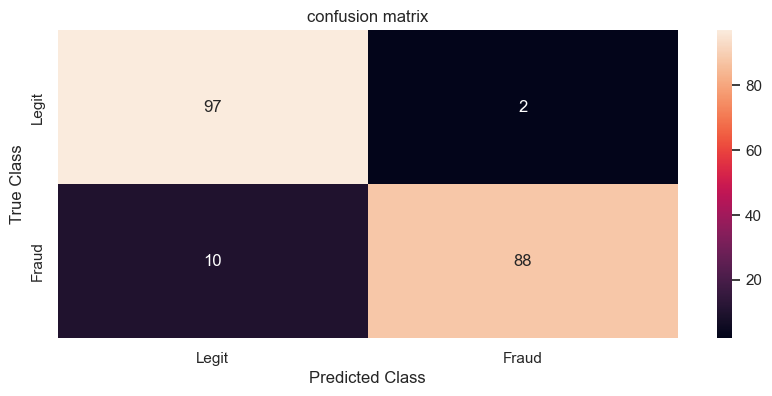

In [85]:
#visulalizing the confusion matrix

labels = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(y_test, X_test_prdiction)
plt.figure(figsize = (10, 4))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, 
           fmt = 'd')
plt.title('confusion matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()